# Prediction using Unsupervised Machine Learning

## Author:- Mrityunjay Srivastava

#### Problem Statement :- From the given 'Iris' dataset, Predict the optimum number of clusters and represent it visually

In [51]:
#importing required libraries
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [52]:
# filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

## Reading The Data For Further Analysis

In [20]:
# Loading the CSV data into a DataFrame df
df = pd.read_csv(r'C:\Users\mrity\OneDrive\Desktop\TSF\Task2\IrisDataset.csv', delimiter=',')
print("Data is imported successfully")


Data is imported successfully


## Exploratory Data Analysis

In [21]:
#head of the data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
#deleting unnecessary attributes
df.drop(columns = "Id" , inplace = True)

In [23]:
#checking the sape of the data
df.shape

(150, 5)

In [24]:
#checking for unique values
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [25]:
# Checking the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
# Checking for missing values if any
df.isnull().sum().sort_values(ascending=False)

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [27]:
# Summary of all numerical data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [53]:
#Scaling the data
x = df.iloc[:,0:4].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


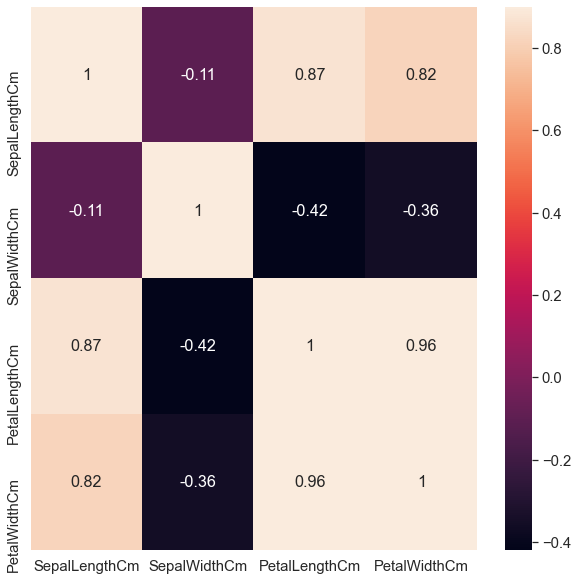

In [28]:
# Showing correlation between the variables
dataset=df.iloc[:,0:4]
Co=dataset.corr()
display(Co)
# Plotting the correlation matrix using heatmap
sns.set(font_scale=1.35)
f, ax = plt.subplots(figsize=(10,10))
hm=sns.heatmap(Co, annot = True,vmax=.9)

<AxesSubplot:>

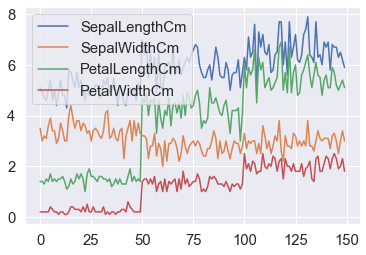

In [30]:
#line plotting  of numerical data
df.plot(kind = "line")

## Univariate Analysis

In [34]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

Balanced Dataset

Text(0.5, 0, 'SepalWidth')

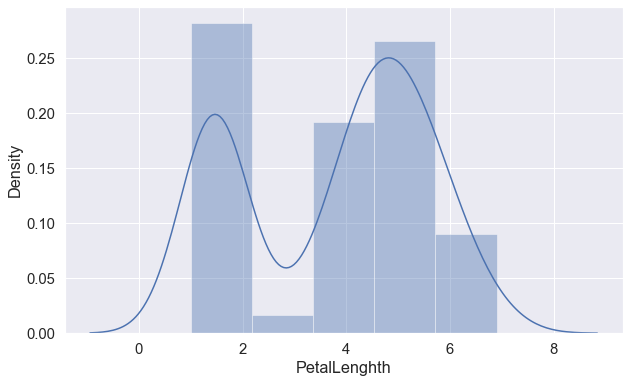

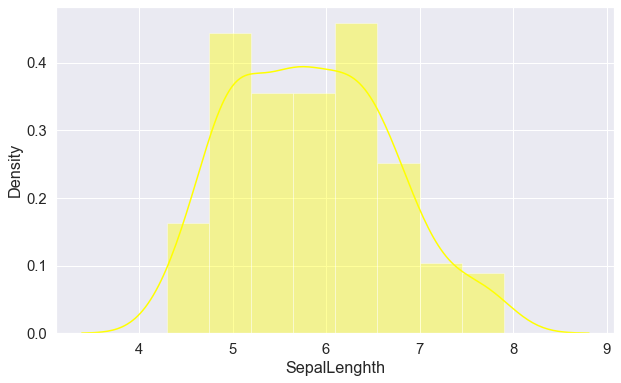

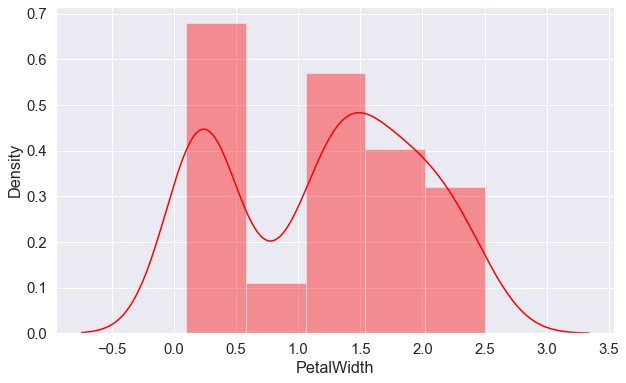

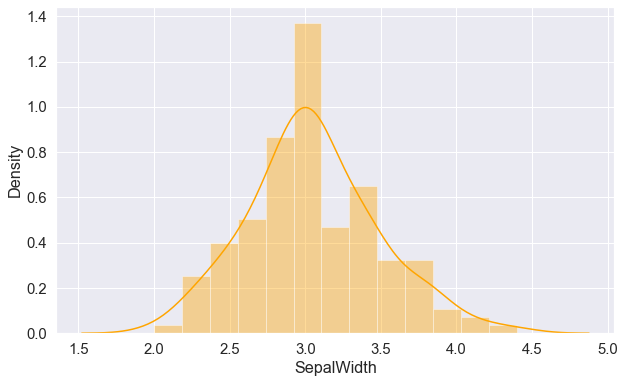

In [37]:
#data variation in petallength
plt.figure(figsize=(10,6))
sns.distplot(df["PetalLengthCm"])
plt.xlabel('PetalLenghth')

#data variation in sepallength
plt.figure(figsize=(10,6))
sns.distplot(df["SepalLengthCm"],color='yellow')
plt.xlabel('SepalLenghth')

#data variation in petalwidth
plt.figure(figsize=(10,6))
sns.distplot(df["PetalWidthCm"],color='red')
plt.xlabel('PetalWidth')

#data variation in sepalwidth
plt.figure(figsize=(10,6))
sns.distplot(df["SepalWidthCm"],color='orange')
plt.xlabel('SepalWidth')

## Bivariate Analysis

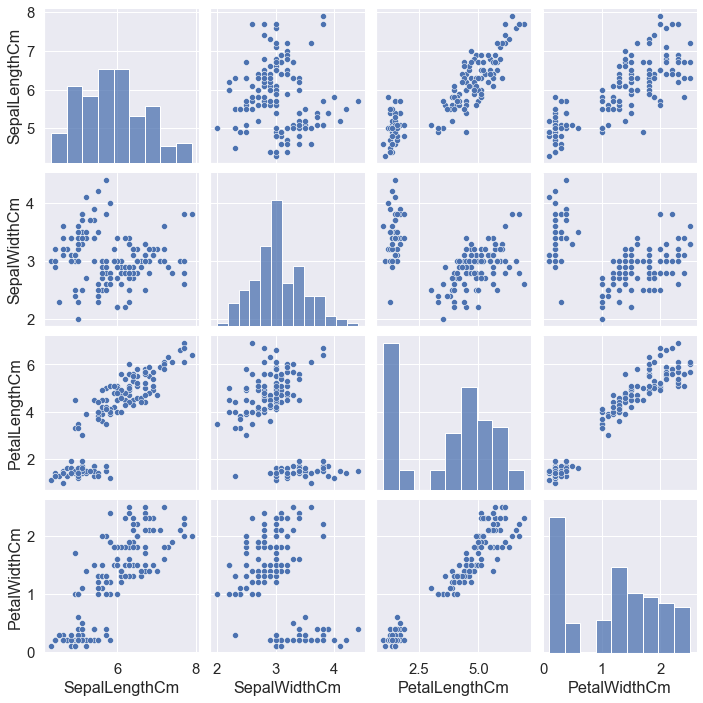

In [38]:
#plotting pairplot
sns.pairplot(data = df)

## Elbow method to find value of k

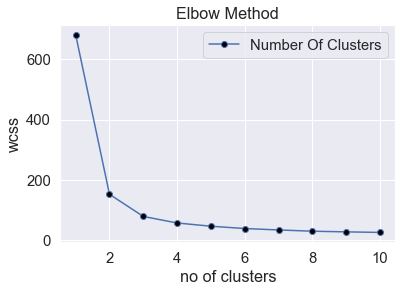

In [41]:
from sklearn.cluster import KMeans
wcss=[]  ## WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
wcss

#Elbow Method- to find value of k
plt.plot(range(1,11),wcss , marker='o' ,  markerfacecolor='black')
plt.title('Elbow Method')
plt.xlabel('no of clusters')
labels = ["Number Of Clusters" , "Wcss"]
plt.ylabel('wcss')  # Within cluster sum of squares   #wcss is low for higher no. of clusters
plt.legend(labels=labels)
plt.show()

We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

clearly the number of clusters is 3.


## k-Means Clustering

In [47]:
#clustering
kmeans = KMeans(n_clusters = 3, random_state = 0)
i_kmeans = kmeans.fit_predict(x)

In [48]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

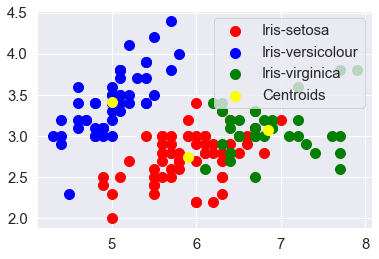

In [50]:
# Visualising the clusters - On the first two columns
plt.scatter(x[i_kmeans  == 0, 0], x[i_kmeans  == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[i_kmeans  == 1, 0], x[i_kmeans  == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[i_kmeans  == 2, 0], x[i_kmeans  == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

This shows the clusters present in the given dataset among species setosa, versicolour, virginica.